# Part I - (Dataset Exploration Title)
## by Hind Khouya

## Introduction
> I am Using the data set that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area, "Ford GoBike System Data".


## Preliminary Wrangling


In [38]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike =pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Check the columns and their data types
bike.info()
print('*' *55)
print(bike.shape)
print('*' *55)
print(bike.dtypes)
print('*' *50)
bike.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Check values in each column
bike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [5]:
# check for null values
bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Data Cleaning

In [6]:
# Make a copy of the dataframe before the cleaning process
GoBike = bike.copy()

### Issue #1: Missing values in start_station_id, start_station_name, end_station_id , end_station_name, member_birth_year, member_gender columns

#### Define: Drop the rows with missing values

#### Code

In [7]:
GoBike.dropna(inplace=True)

#### Test

In [8]:
GoBike.isnull().any().sum()

0

### Issue #2: start_time and end_time columns are in string (object)

#### Define: Convert the columns to datetime

#### Code

In [9]:
GoBike['start_time'] = pd.to_datetime(GoBike['start_time'])
GoBike['end_time'] = pd.to_datetime(GoBike['end_time'])

#### Test

In [10]:
GoBike['end_time'][0]

Timestamp('2019-03-01 08:01:55.975000')

### Issue #3: bike_id in string (object)

#### Define: Convert the column to string(object)

#### Code

In [11]:
GoBike['bike_id'] =GoBike.bike_id.astype(str)

#### Test

In [12]:
type(GoBike['bike_id'][0])

str

### Data Exploration
Extracting the day, month and year colunns fron the start and end date

In [13]:
import datetime as dt
GoBike['start_day'] = GoBike['start_time'].dt.day_name()
GoBike['start_month'] = GoBike['start_time'].dt.month_name()
GoBike['start_year'] = GoBike['start_time'].dt.year
GoBike['start_hr'] = GoBike['start_time'].dt.hour
GoBike['start_hr'] = GoBike.start_hr.astype(str)




GoBike['end_day'] = GoBike['end_time'].dt.day_name()
GoBike['end_month'] = GoBike['end_time'].dt.month_name()
GoBike['end_hr'] = GoBike['end_time'].dt.hour
GoBike['end_hr'] = GoBike.end_hr.astype(str)

GoBike['start_year'] = GoBike['start_time'].dt.year

GoBike.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_year,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,Thursday,February,2019,17,Friday,March,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,Thursday,February,2019,12,Friday,March,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,Thursday,February,2019,17,Friday,March,4


In [14]:
# create a new column duration_minute to show the ride duration in munites instaed os seconds.
GoBike['duration_minute'] = GoBike['duration_sec']/60

In [15]:
# create a new column duration_minute to show the ride duration in munites instaed os seconds.
GoBike['duration_hours'] = GoBike['duration_minute']/60

In [16]:
# descriptive statistics for the numeric variable (duration_sec)
GoBike.duration_sec.describe()
GoBike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?

There were  initially 183,412 rides in the dataset with 16 features which was later dropped to 174952 rides and 25 features after fueature engineering. There are 2 datetime, 9 float, 1 int and 13 categorical(string) variables with no particular order.

### What is/are the main feature(s) of interest in your dataset?

- I am interested in finding out what time of the day, day of the week, month of the year were most trips taken(although there is only february and march in the dataset). 
- How long does the average trip take? 
- also I want explore if the number of trips and average duration differ substantially for the subscriber and customer or not. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe the The duration, start and end time, bike_id, user_type, bike_share_for_all_trip would help to figure out if most of the subscribers/customers drive for similar duration or not.
Also will provide me with the information needed for this findings because I would be able to extract the day, week, and month columns. 
My prediction is that the subscribers will have higher numbers compare to customers in regards to duration, number of trips, And I expect most trips to take place in the morning hour, weekdays and holiday months.

## Univariate Exploration

> I am going to explore the data starting with number of trips for two user types which is customers and subscribers. A customer is someone who holds a single-ride or day pass(casual riders) while a subscriber carries a monthly or annual pass. I am expecting to see more ride usage from subscribers than casual users.

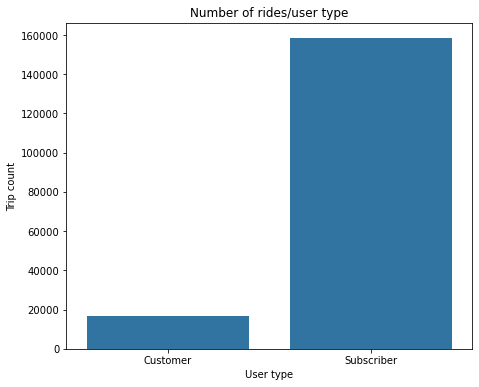

In [17]:
# Plot user_type to get an idea of counts
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 2);
sb.countplot(data=GoBike, x = 'user_type', color=base_color,)
plt.xlabel('User type')
plt.ylabel('Trip count');
plt.title('Number of rides/user type');

> As I expected, it looks like there are way more trips for subscribers(close to 160k) than customers(close to 20K). Subscribers tend to be daily riders so their trip usage is showing way more than casual rider. 

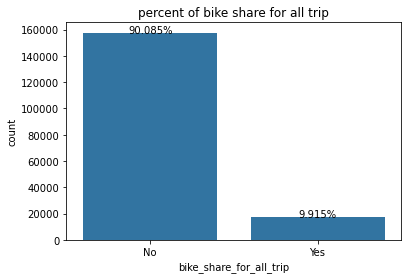

In [18]:
# ride frequency per bike_share_for_all_trip
ax = sb.countplot(data = GoBike, x = 'bike_share_for_all_trip',  color=sb.color_palette()[0],
                  order=GoBike.bike_share_for_all_trip.value_counts().index)

total = len(GoBike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
    plt.title('percent of bike share for all trip');
plt.show();

> Riders who are members of 'Bike share for all' program are way less as compare to riders who are not.

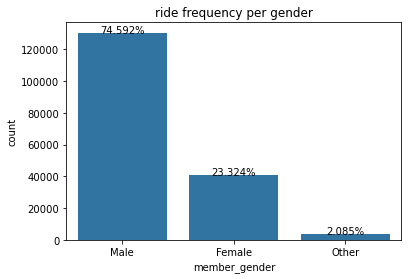

In [19]:
# ride frequency per gender
ax = sb.countplot(data = GoBike, x = 'member_gender',  color=sb.color_palette()[0], order=GoBike.member_gender.value_counts().index)

total = len(GoBike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
    plt.title('ride frequency per gender');
plt.show();

> There are more of subscribers (about 90%) than normal customers and more non bike sharing for all trip (about 90%) that bike sharing for all trip.
Most of the riders are male (>70%)

### What is the average trip duration?

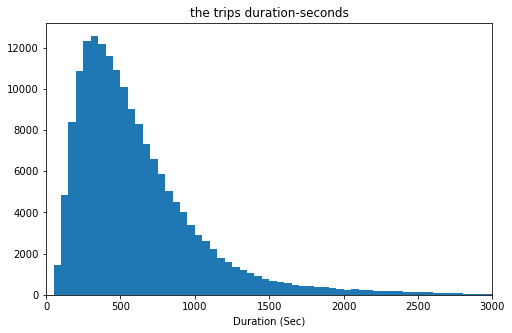

In [22]:
# start with a standard-scaled plot
binsize = 50
bins = np.arange(50, GoBike['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = GoBike, x = 'duration_sec', bins=bins)
plt.xlabel('Duration (Sec)')
plt.title('the trips duration-seconds');
plt.xlim([0, 3000]);

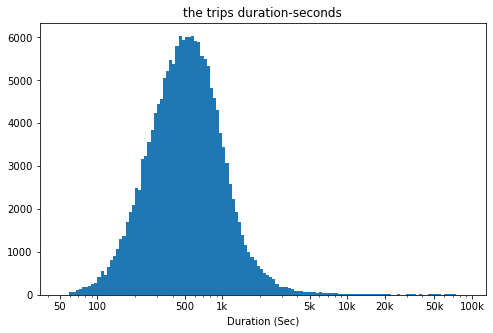

In [21]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(GoBike['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = GoBike, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.title('the trips duration-seconds');
plt.xlabel('Duration (Sec)');

> Duration has a long-tailed distribution, with a lot of trips on the short duration end (200 - 1000 secs) and few on the long duration end. It has a peak at around 500 secs and a smooth fall till arounf 10k secs. There are fewer longer durations afterwards with spaces in between.

### How many trips in a week, day, hour?

In [23]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    GoBike[var] = GoBike[var].astype(ordered_var)

[Text(0.5, 1.0, 'numbers of rides the ending day')]

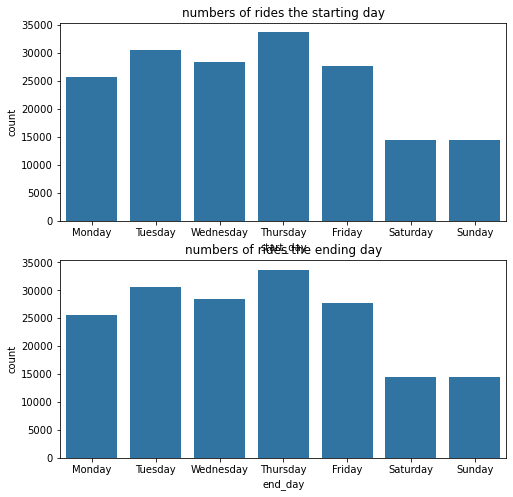

In [24]:
# ride frequency per days

fig, ax = plt.subplots(2, figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = GoBike, x = 'start_day', color = default_color,  ax = ax[0]).set(title='numbers of rides the starting day')
sb.countplot(data = GoBike, x = 'end_day', color = default_color,  ax = ax[1]).set(title='numbers of rides the ending day')


> Most of the trips were taken (start and end days) on Thurdays, followed by Tuedays, then, Friday, Wednesday and Monday. 
Weekends (Saturdays and Sundays) have the lowest trip records

[Text(0.5, 1.0, 'numbers of rides per ending hours')]

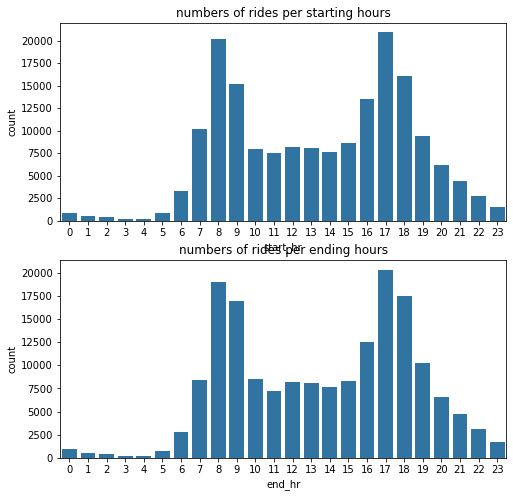

In [25]:
# ride frequency per hours

fig, ax = plt.subplots(2,figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = GoBike, x = 'start_hr', color = default_color,  ax = ax[0]).set(title='numbers of rides per starting hours')
sb.countplot(data = GoBike, x = 'end_hr', color = default_color, ax = ax[1]).set(title='numbers of rides per ending hours')

> As observed for the days, the 8th, 9th, 17th and 18th hours have the highest trip records. This is expected as it can be linked to morning rush and closing hour from work. 
The 3rd and 4th hours have the least trip records.

['174952 (100.000%)']

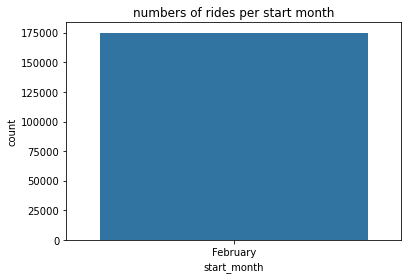

In [26]:
# trip end frequency per day

sb.countplot(x=GoBike['start_month'],
                   order=GoBike['start_month'].value_counts(ascending=False).index).set(title='numbers of rides per start month');
        
abs_values = GoBike['start_month'].value_counts(ascending=False)
rel_values = GoBike['start_month'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.3f}%)' for p in zip(abs_values, rel_values)]
lbls
lbls
# ax.bar_label(container=ax.containers[0], labels=lbls)

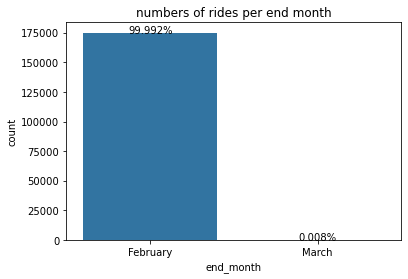

In [27]:
# trip end frequency per month

ax = sb.countplot(data = GoBike, x = 'end_month',  color=sb.color_palette()[0], order=GoBike.end_month.value_counts().index)

total = len(GoBike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title("numbers of rides per end month")
plt.show();

> All the trips started and ended in February except for a very few which ended in March 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As  expected the most riders are male and subscibers, but the unexpected is the Weekends (Saturdays and Sundays) have the lowest trip records.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> to answer the question of how many trips in a day, hour i had to convert day, and hour into ordered categorical types

## Bivariate Exploration

In [28]:
categoric_vars = ['user_type', 'member_gender', 'bike_share_for_all_trip', 'start_day','end_day', 'start_hr', 'end_hr']

<Figure size 720x720 with 0 Axes>

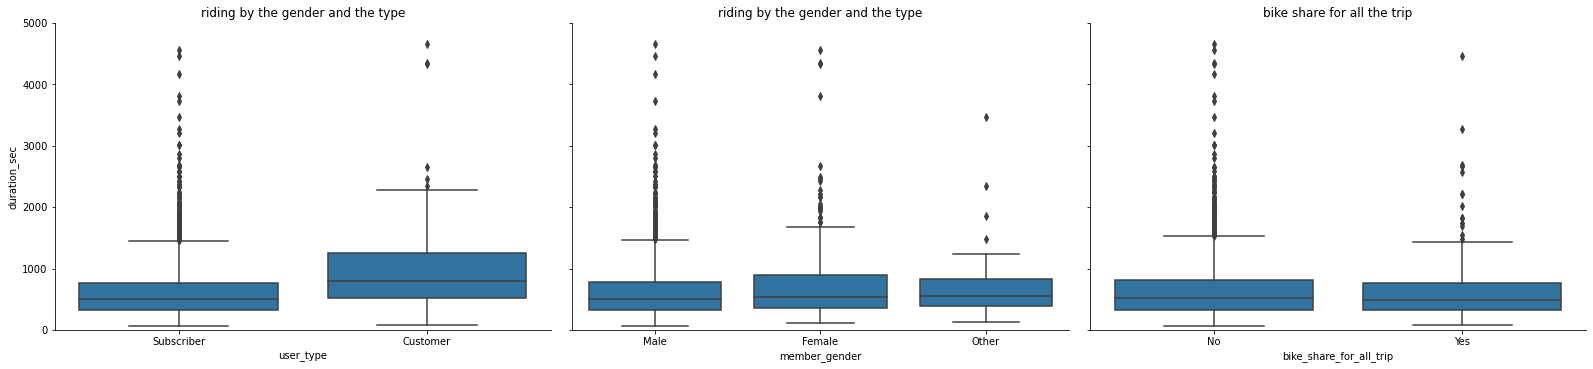

In [40]:
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(GoBike.shape[0], 2000, replace = False)
diamonds_samp = GoBike.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = 'duration_sec', x_vars = ['user_type', 'member_gender', 
                                                                         'bike_share_for_all_trip'],
                size = 5, aspect = 1.5).set(title="riding by the gender and the type")
g.map(boxgrid)
plt.ylim([0,5000])
plt.title("bike share for all the trip")
plt.show();

> It appears that customers spend more time on average compare to subscribers while the female gender spend higher time on average than male.
Bike share for all trip tends to be similar on average across all types .

<Figure size 720x720 with 0 Axes>

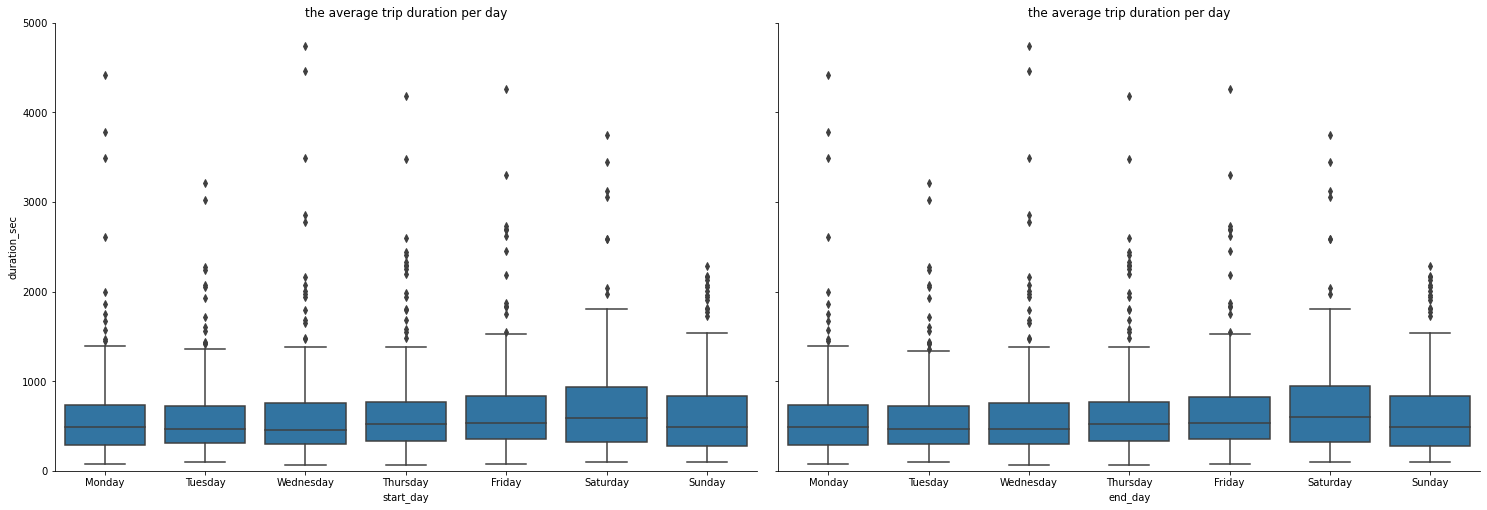

In [41]:
samples = np.random.choice(GoBike.shape[0], 2000, replace = False)
diamonds_samp = GoBike.iloc[samples,:]
#calling the function boxgrid
boxgrid

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = diamonds_samp, y_vars = 'duration_sec', x_vars = [ 'start_day','end_day'],
                size = 7, aspect = 1.5).set(title="the average trip duration per day")
g.map(boxgrid)
plt.ylim([0,5000])
plt.title("the average trip duration per day")
plt.show();

> Interestingly, it appears that there is a positive relationships between the trip duration and days of the week.
The average trip durations iincreases from monday through Sunday

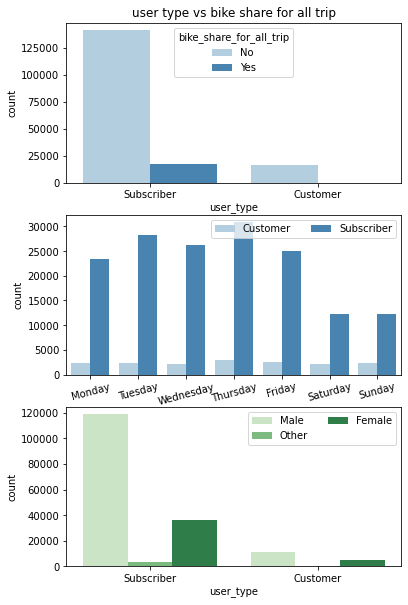

In [42]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [6, 10])

# subplot 1: user_type vs bike_share_for_all_trip
plt.subplot(3, 1, 1)
sb.countplot(data = GoBike, x = 'user_type', hue = 'bike_share_for_all_trip', order=GoBike.user_type.value_counts().index,
             palette = 'Blues').set(title="user type vs bike share for all trip")

# subplot 2: end_day vs. user_type
ax = plt.subplot(3, 1, 2)
sb.countplot(data = GoBike, x = 'start_day', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=15)

# subplot 3: user_type vs. member_gender, 
ax = plt.subplot(3, 1, 3)
sb.countplot(data = GoBike, x = 'user_type', hue = 'member_gender',order=GoBike.user_type.value_counts().index,
             palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.show()

>We can deduce that bike sharing is only available to subscribers and customer type doesn't really affect the number of trips in any week day. 

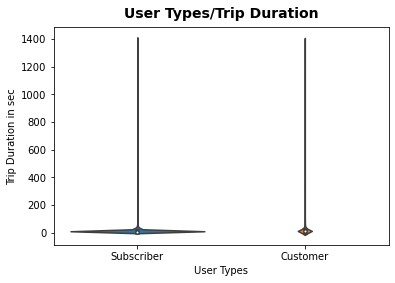

In [43]:
# Plot user_type and duration_minute

sb.violinplot(data=GoBike, x='user_type', y='duration_minute', order=["Subscriber", "Customer"], scale='count');
plt.xlabel('User Types');
plt.ylabel('Trip Duration in sec');
plt.title('User Types/Trip Duration', fontsize=14, fontweight='semibold', y=1.015);

> Members and non-members of the 'Bike share for all' program seem to have a similar distribution of trip duration.
> There is definitely similar pattern when it comes to their trip usage over only 2 months of 2019.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> it appears that there is a positive relationships between the trip duration and days of the week.
The average trip durations increases from monday through Sunday

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> bike sharing is only available to subscribers, customer usually don't share bikes

## Multivariate Exploration

Text(0, 0.5, 'Avg. Duration')

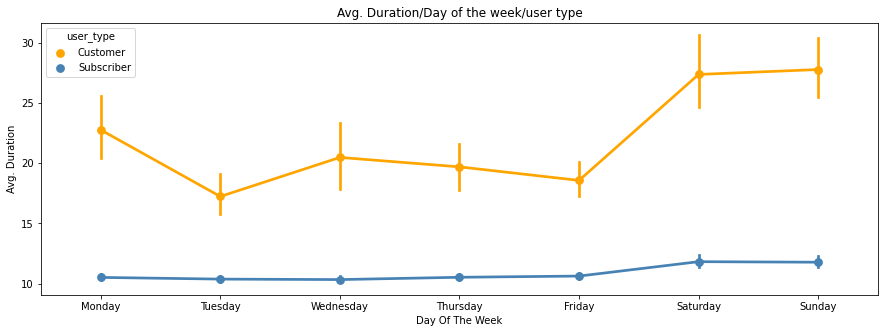

In [48]:
# Plot number of rides per user type for each day of the week
plt.figure(figsize=(15,5))
palette={'Subscriber':'steelblue', 'Customer':'Orange'};
sb.pointplot(data=GoBike, x='start_day', y='duration_minute', hue='user_type', palette=palette)
plt.title('Avg. Duration/Day of the week/user type')
plt.xlabel('Day Of The Week')
plt.ylabel('Avg. Duration')

> Customers travel very longer distance regardless the day of the week(longest on weekends) whereas subscribers generally travel short distance with litle increase on weekends but not up to that of the customers.

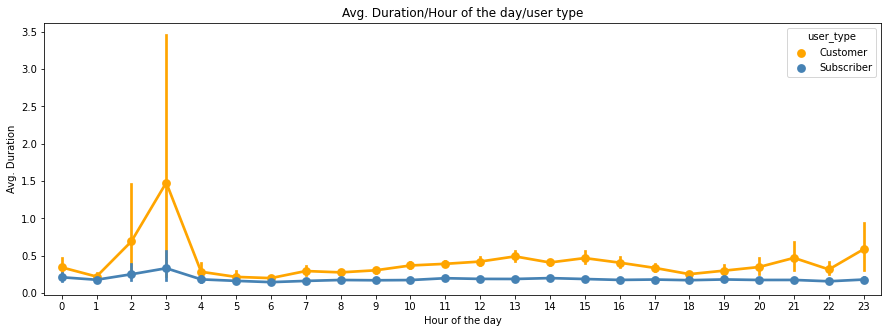

In [49]:
# Plot number of rides per user type for each hour
plt.figure(figsize=(15,5))
sb.pointplot(data=GoBike, x='start_hr', y='duration_hours', hue='user_type', palette=palette)
plt.title('Avg. Duration/Hour of the day/user type')
plt.xlabel('Hour of the day')
plt.ylabel('Avg. Duration');

> Note that point plots shows only the median value. Both the charts shows that mean for customers is higher than subscriber, customer being a casual and not so regular rider might be riding for longer duration.
> Across the hours of the day, customer duration mean is shows a considerable rise  between 10 am to 2 pm and decline towards the end of the day. Subscriber's mean shows steady values about half an hour. There is rise in values around 2 am -3am, may be due to one or two values being very high.

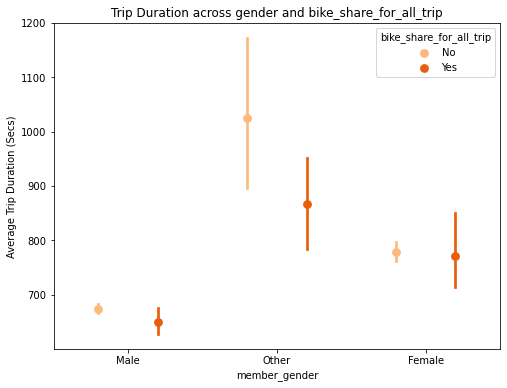

In [50]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = GoBike, x ='member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Oranges', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

>The other gender group travels for the longest duration for bike sharing and non bike sharing, followed by female, then, male

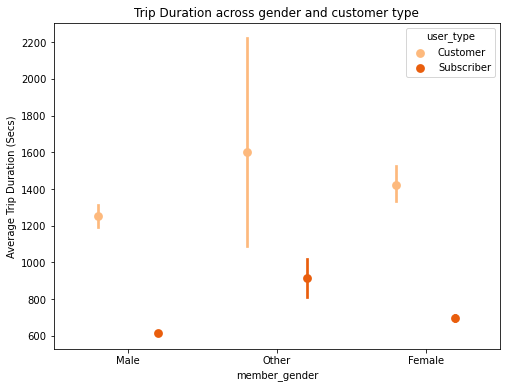

In [51]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = GoBike, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Oranges', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and customer type')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

>The other gender group travels for the longest duration for bike sharing and non bike sharing, followed by female, then, male

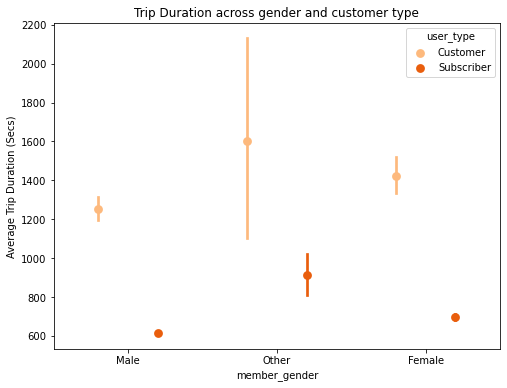

In [52]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = GoBike, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Oranges', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and customer type')
plt.ylabel('Average Trip Duration (Secs)')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.show();

> For both subscribers and customers, the other gender group spent most duration followed by female and then male

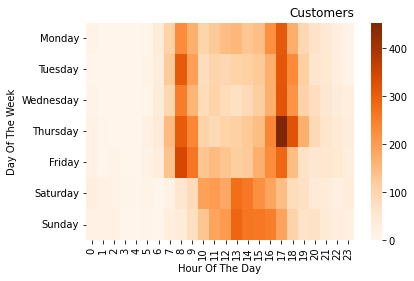

In [53]:
# Creating a heatmap for the relationship between  hour of the week and start_day for each user type such as customer and subscriber

# create a dataframe for all the trips for user Customer
customers = GoBike.query('user_type=="Customer"')
                           
ct_counts = customers.groupby(['start_day', 'start_hr']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'start_day', columns = 'start_hr', values = 'count')

#plot the heatmap
#plt.subplot(2, 1, 2)
sb.heatmap(ct_counts, cmap='Oranges');
plt.xlabel('Hour Of The Day');
plt.ylabel('Day Of The Week');
plt.title('Customers', loc='right');

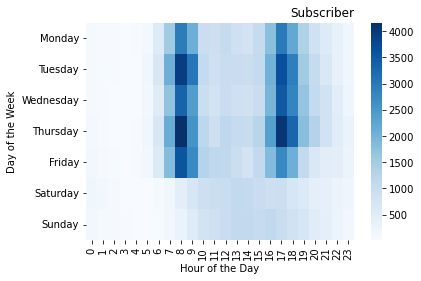

In [54]:
# Creating a heatmap for the relationship between  hour of the week and start_day for each user type such as customer and subscriber

# create a dataframe for all the trips for user Subscribers
subscribers = GoBike.query('user_type == "Subscriber"')

st_counts = subscribers.groupby(['start_day', 'start_hr']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_day', columns='start_hr', values='count')

#plot the heatmap
#plt.subplot(2, 1, 2)
sb.heatmap(st_counts, cmap='Blues');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of the Day');
plt.ylabel('Day of the Week');

> Subscribers clearly have heavy usage during the weekdays rush hours (Monday - Friday, 7am-9am and 4pm-6pm. Considering these users have subscription and might be using the bike rides for more routine/fix ddistances for example to go to work. Early, middle of the day and late hours as well as weekends have very low usage.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Heatmap is a great way to show the relation between day of the week and hour of the day to measure the ride usage. 

### Were there any interesting or surprising interactions between features?

> there is an interaction between the day of the week and the ride usage, which leads to the possibility of "the bike riders are using the bike as a transport way to go to their work".

## Conclusions

The dataset is just for the months of February and March 2019

The average duration for all trips is about 500 seconds

Most trips were taken on Thursdays and Tuesdays

Weekends have the least trip records

The rush hours; going to work in the morning (8 and 9 hrs) and closing in the evening (17 and 18 hrs) have the highest trip records

About 90% of the trips were taken by subscribers

Less than 10% of the trips were bike sharing for all trips

Most of the trips were taken by males (>70%)

Customers spend more duration than subscribers

Females spend more duration than males

Trip durations on weekends are longer than on other weekdays

Only subscribers are allowed to share bikes on trips

Customer type doesn't really affect the number of trips per weekday

Customers travel for longer durations regardless of the day of the week as compared to subscribers. 
